In [37]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


# mouse and study files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read mouse data and the study results files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# single DataFrame
mouse_study_complete = pd.merge(mouse_metadata,study_results, how= "left", on=["Mouse ID", "Mouse ID"])

# Display new df
mouse_study_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [38]:
#Number of mice 
mouse_count1 = mouse_study_complete["Mouse ID"].nunique()
print(f"The total number of studied mice is {mouse_count1}")

The total number of studied mice is 249


In [39]:
#display Mouse ID duplicates in mouse_study_complete df using unique
duplicate_mouse = mouse_study_complete.loc[mouse_study_complete.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse


array(['g989'], dtype=object)

In [40]:
#from above we know duplicate Mouse ID is g989, display duplicate in a neat duplicate df
duplicate_mouse_ID = mouse_study_complete.loc[mouse_study_complete['Mouse ID'] =='g989', :]
duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
#Drop duplicates in mouse id
#source: https://www.geeksforgeeks.org/delete-duplicates-in-a-pandas-dataframe-based-on-two-columns/
drop_data_frame = mouse_study_complete.drop_duplicates(subset = ['Mouse ID','Timepoint'],keep = 'first')
drop_data_frame.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
#number of mice after dropping duplicates, matches one less row in drop_data_frame above
mouse_count2 = new_mouse_df["Mouse ID"].nunique()
print(f"The total number of studied mice after dropping duplicates: {mouse_count2}")

The total number of studied mice after dropping duplicates: 248


# Summary Statistics

In [8]:
#groupby tumor volume with corresponding drug regiment for mean, median, variance, std, and sem 
average_tumor_vol = new_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_tumor_vol = new_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_tumor_vol = new_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_tumor_vol = new_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM_tumor_vol = new_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#combine all groupby variables in new dataframe with column titles
summary_df = pd.DataFrame({"Mean Tumor Volume":average_tumor_vol,"Median Tumor Volume": median_tumor_vol, "Tumor Volume Variance": variance_tumor_vol, "Tumor Volume Std. Dev.": std_tumor_vol, "Tumor Volume Std. Err.": SEM_tumor_vol})
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#use aggregate function used to find mean, median, variance, std, sem AFTER grouping drug regimen and tumor volume values 
summary2_df = new_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

Text(0, 0.5, 'Total Num of Observed Mouse Timepoints Per Drug')

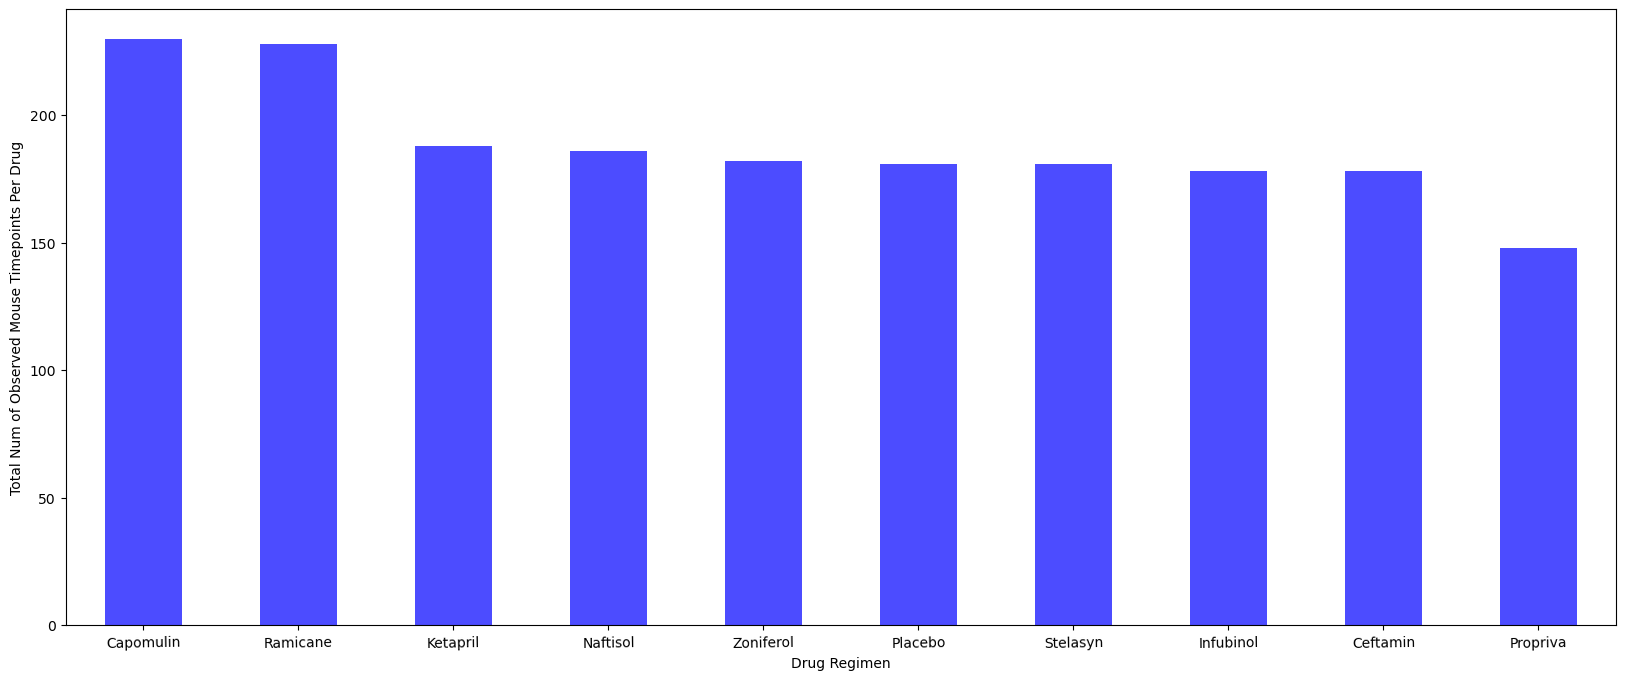

In [10]:
#bar chart for every value found for each drug regimen (value_counts)
total_row_timepoint_count = new_mouse_df["Drug Regimen"].value_counts()
total_row_timepoint_count.plot(kind='bar',color='b', figsize=(20,8), alpha=0.7, rot=1)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Num of Observed Mouse Timepoints Per Drug")



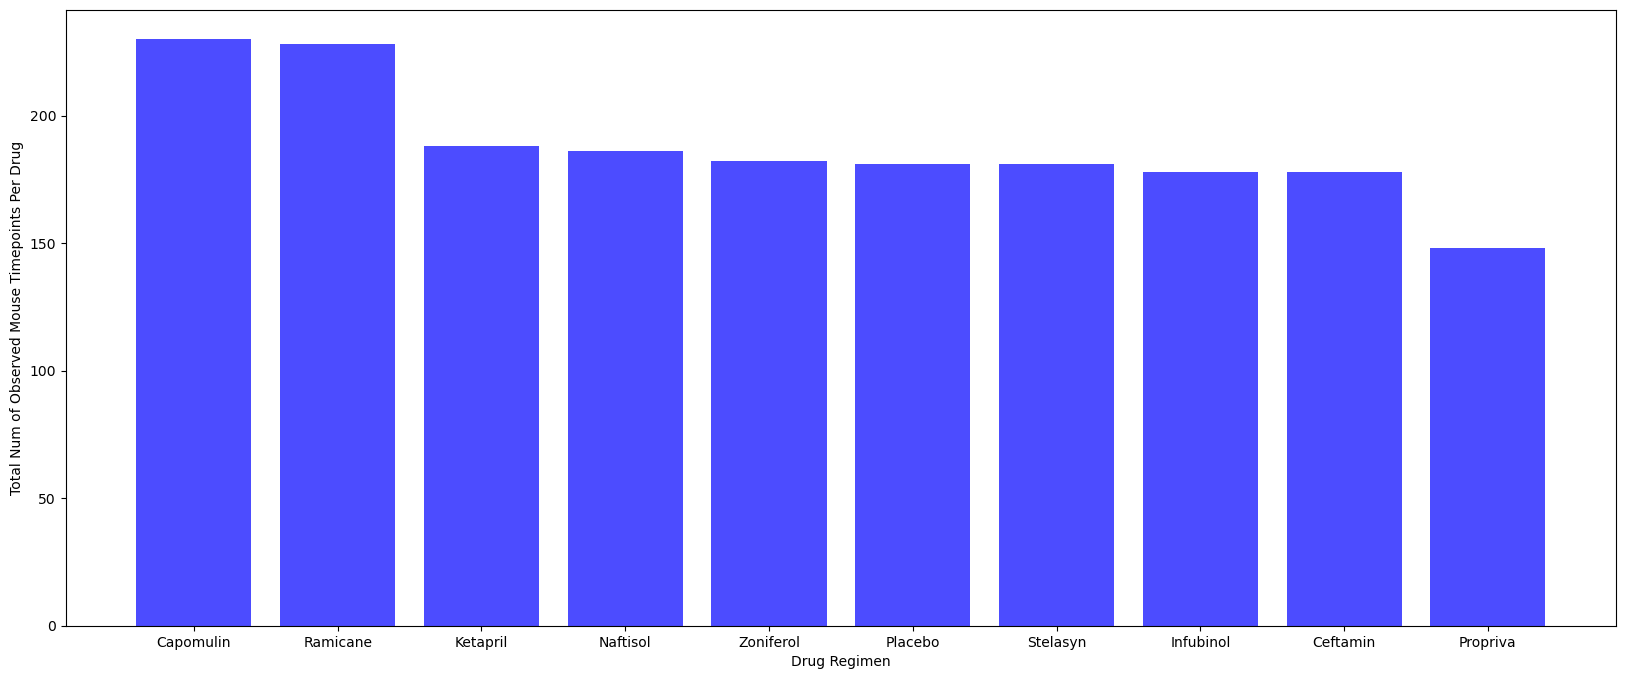

In [11]:
#bar chart for every value found for each drug regimen (value_counts) using different method
x_axis = total_row_timepoint_count.index
y_axis = total_row_timepoint_count
plt.figure(figsize=(20,8))
plt.bar(x_axis, y_axis, color='b', alpha=0.7)
plt.xticks(total_row_timepoint_count.index, rotation='horizontal')
plt.xlabel("Drug Regimen")
plt.ylabel("Total Num of Observed Mouse Timepoints Per Drug")
plt.show()

<Axes: ylabel='sex'>

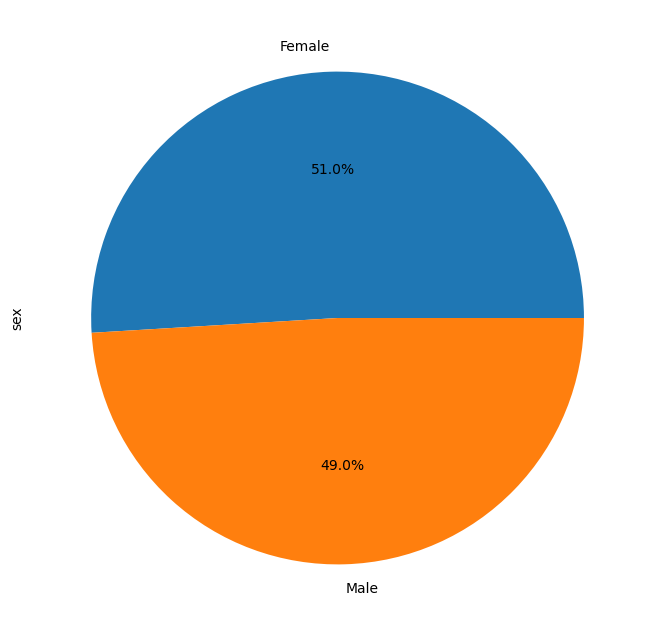

In [12]:
#pie chart for agg values found for each sex (value_counts) and converted to percentage 
total_row_sex_count = new_mouse_df["Sex"].value_counts()
total_row_sex_count.plot(kind='pie', ylabel='sex', figsize=(20,8), labels=['Female', 'Male'], autopct='%1.1f%%')


<Axes: ylabel='sex'>

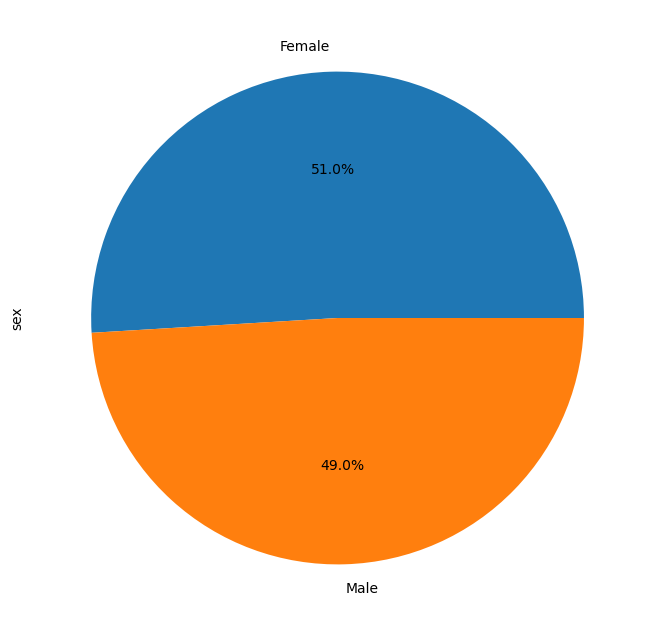

In [13]:
#pie chart for agg values found for each sex (value_counts), converted to percentage, using different method
total_row_sex_count.plot.pie(ylabel='sex', figsize=(20,8), labels=['Female', 'Male'], autopct='%1.1f%%')

# Quartiles, Outliers and Boxplots

In [44]:

# assign variable to specific drug regimens found in original df: Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_final = new_mouse_df.loc[(new_mouse_df["Drug Regimen"]) == "Capomulin",:]
Ramicane_final = new_mouse_df.loc[(new_mouse_df["Drug Regimen"]) == "Ramicane",:]
Infubinol_final = new_mouse_df.loc[(new_mouse_df["Drug Regimen"]) == "Infubinol",:]
Ceftamin_final = new_mouse_df.loc[(new_mouse_df["Drug Regimen"]) == "Ceftamin",:]
# using above variables, groupby mouse id and (max) timepoint and assign a new variable
Capomulin_final_timepoint = Capomulin_final.groupby('Mouse ID').max()['Timepoint']
Ramicane_final_timepoint = Ramicane_final.groupby('Mouse ID').max()['Timepoint']
Infubinol_final_timepoint = Infubinol_final.groupby('Mouse ID').max()['Timepoint']
Ceftamin_final_timepoint = Ceftamin_final.groupby('Mouse ID').max()['Timepoint']
# Merge new dataframe created within merge function with the original DataFrame to get last max timepoint for every mouse id
merged_Capomulin_df = pd.merge(pd.DataFrame(Capomulin_final_timepoint), new_mouse_df, on=("Mouse ID","Timepoint"),how="left")
merged_Ramicane_df = pd.merge(pd.DataFrame(Ramicane_final_timepoint), new_mouse_df, on=("Mouse ID","Timepoint"),how="left")
merged_Infubinol_df = pd.merge(pd.DataFrame(Infubinol_final_timepoint), new_mouse_df, on=("Mouse ID","Timepoint"),how="left")
merged_Ceftamin_df = pd.merge(pd.DataFrame(Ceftamin_final_timepoint), new_mouse_df, on=("Mouse ID","Timepoint"),how="left")
#combined all merged df for use in next cell
combined_list = [merged_Capomulin_df,merged_Ramicane_df, merged_Infubinol_df, merged_Ceftamin_df]
combined_drug_df = pd.concat(combined_list)
#merged_Ceftamin_df


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = {}



for drug_name in drug_names:
    
        drug = combined_drug_df.loc[combined_drug_df['Drug Regimen'] == drug_name]
        quartiles = drug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
        lowerq = quartiles[0.25] 
        upperq = quartiles[0.75]  
        iqr = upperq - lowerq
        lower_bound = lowerq - (1.5 * iqr)
        upper_bound = upperq + (1.5 * iqr)
       
        outliers = drug.loc[(drug['Tumor Volume (mm3)']< lower_bound) | (drug['Tumor Volume (mm3)'] > upper_bound)]
        tumor_vol_data[drug_name] = {"final_vol": drug, "lowerq": lowerq, "upperq": upperq, "iqr": iqr, "lower_bound": lower_bound, "upper_bound": upper_bound, "outliers": outliers}  

for drug_name, data in tumor_vol_data.items():
    
    
    
        print(f"{drug_name}'s potential outliers: {data['outliers']}") 
           
   

Capomulin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
Ramicane's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
Infubinol's potential outliers:   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
5     c326          5    Infubinol  Female          18          25   

   Tumor Volume (mm3)  Metastatic Sites  
5           36.321346                 0  
Ceftamin's potential outliers: Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []


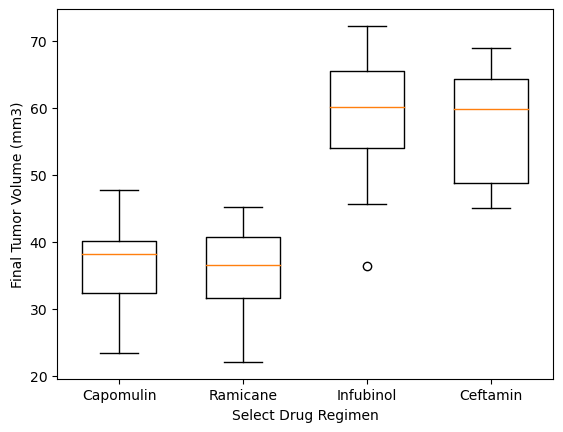

In [47]:
#box plot displays summary stats including outliers
#drug names set as labels, tumor_data list set as y values, to identify Infubinol outlier listed in the above cell
Drug_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#the tumor_data list calls for all tumor volume (mm3) values relative to merged drug regimen 
tumor_data = [(merged_Capomulin_df['Tumor Volume (mm3)']),(merged_Ramicane_df['Tumor Volume (mm3)']), (merged_Infubinol_df['Tumor Volume (mm3)']), (merged_Ceftamin_df['Tumor Volume (mm3)'])]
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Select Drug Regimen')
ax1.boxplot(tumor_data, labels=Drug_names, widths=0.6, vert=True)
plt.show()

# Line and Scatter Plots

In [17]:
line_plot1 = Capomulin_final.loc[Capomulin_final["Mouse ID"] == "b128",:]
line_plot1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


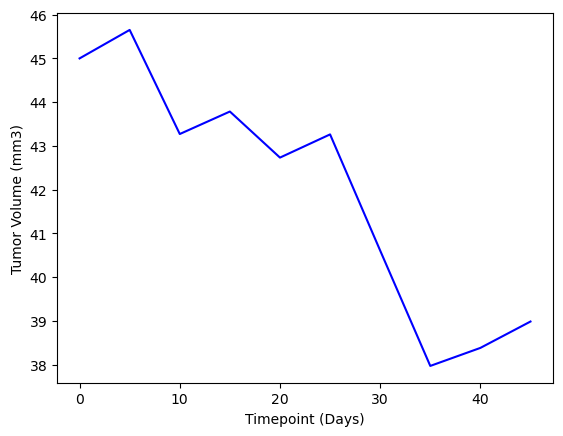

In [18]:
horizontal = line_plot1['Timepoint']
vertical = line_plot1['Tumor Volume (mm3)']
plt.plot(horizontal, vertical,color="blue")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

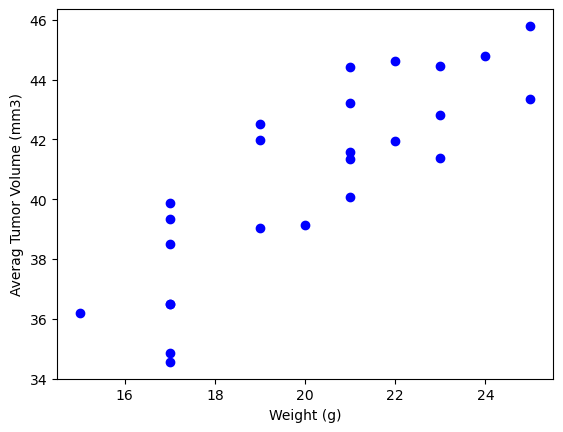

In [19]:
#search for Capomulin under Drug Regimen colomn ONLY because focus of scatter plot is Capomulin
Capomulin_final = new_mouse_df.loc[new_mouse_df['Drug Regimen'] == 'Capomulin']
#Capomulin only series grouped with CO'Mouse ID', ensures only 24 mouse IDs (or dots on scatter plot) for Capomulin
capomulin_grouped = Capomulin_final.groupby('Mouse ID')
average_tum_vol = capomulin_grouped['Tumor Volume (mm3)'].mean()
capomulin_weights =  capomulin_grouped['Weight (g)'].mean()
plt.scatter(capomulin_weights,average_tum_vol, color="b")
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.842


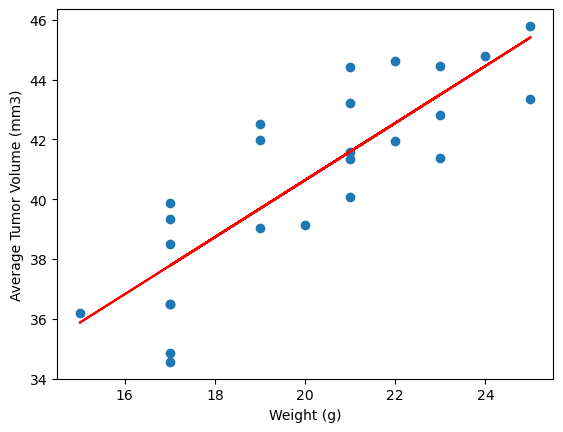

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = stats.pearsonr(capomulin_weights, average_tum_vol)
print(f"The correlation between mouse weight and the average tumor volume is: {round(correlation[0],3)}")
average_tum_vol = capomulin_grouped['Tumor Volume (mm3)'].mean()
capomulin_weights =  capomulin_grouped['Weight (g)'].mean()
plt.scatter(capomulin_weights,average_tum_vol)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(capomulin_weights, average_tum_vol)
regress_values = capomulin_weights * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(capomulin_weights,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show() 
